<font face="Georgia" size="3" color="#007acc">
   <div align="center">
    <h1><strong>Tecnológico de Monterrey</strong></h1>
        <h1><strong>Campus Querétaro</strong></h1>
        <h1>Analítica de datos y herramientas de inteligencia artificial II</h1>
        <h3>Grupo 101</h3>
    <h4><strong>Actividad 6 (Regresión No Lineal)</strong></h4>
           <h4>Ana Michele Hay Robles</h4>
           <h4>A01378047</h4>
           <h4>19 de octubre 2023</h4>
    </div>

</font>
</div>

In [109]:
'''

Crear un nuevo repositorio nuevo con el nombre: Regresión No Lineal
Agregar el archivo: “Cuentas_credicel.csv”
Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers
Elegir 5 modelos de correlación No lineal y Analizar la correlación que existe entre las siguientes variables: Riesgo (variable objetivo), score_buro (variable objetivo), porc_eng (variable objetivo), y limite_crédito (variable objetivo), aplicando la herramienta de “Regresión No Lineal”
Realizar una tabla de todos los coeficientes de determinación obtenidos para cada correlación analizada, según sea el caso.
Crear los archivos requeridos en Google Colab y respaldarlos en GitHub.
Generar un reporte comparativo sobre los análisis realizados y subirlo a GitHub, en formato pdf.
Subir el link del repositorio en CANVAS para “Evaluación”

'''

'\n\nCrear un nuevo repositorio nuevo con el nombre: Regresión No Lineal\nAgregar el archivo: “Cuentas_credicel.csv”\nRealiza las acciones de preprocesamiento necesarias: Nulos y Outliers\nElegir 5 modelos de correlación No lineal y Analizar la correlación que existe entre las siguientes variables: Riesgo (variable objetivo), score_buro (variable objetivo), porc_eng (variable objetivo), y limite_crédito (variable objetivo), aplicando la herramienta de “Regresión No Lineal”\nRealizar una tabla de todos los coeficientes de determinación obtenidos para cada correlación analizada, según sea el caso.\nCrear los archivos requeridos en Google Colab y respaldarlos en GitHub.\nGenerar un reporte comparativo sobre los análisis realizados y subirlo a GitHub, en formato pdf.\nSubir el link del repositorio en CANVAS para “Evaluación”\n\n'

In [110]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from colorama import Fore, Style
from sklearn.preprocessing import MinMaxScaler

In [111]:
df = pd.read_csv('Cuentas_credicel.csv',  encoding='latin-1')

/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/3942086684.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Cuentas_credicel.csv',  encoding='latin-1')


# Pre procesamiento nulos y outliers

In [112]:
# Mostrar valores nulos
def df_nulos(df):
    df_nulos = pd.DataFrame({
        'Count of Null Values': df.isnull().sum(),
        'Null Values Percentage %': round(df.isnull().sum() / len(df) * 100, 2),
        'Data Type': df.dtypes,
        'First Value': df.iloc[0]
    })
    # pd.set_option('display.max_rows', None)
    return df_nulos

df_nulos(df)

Count of Null Values  Null Values Percentage % Data Type  \
folio                                  0                      0.00     int64   
tag                                    0                      0.00    object   
folio_solicitud                        0                      0.00     int64   
fecha                                  0                      0.00    object   
marca                                  0                      0.00    object   
modelo                                 0                      0.00    object   
plazo                                  0                      0.00    object   
precio                                 0                      0.00   float64   
enganche                               0                      0.00   float64   
descuento                              0                      0.00   float64   
semana                                 0                      0.00     int64   
monto_financiado                       0                      0.00   float64   
costo_total                            0                      0.00     int64   
monto_accesorios                       0                      0.00   float64   
agente_venta                           0                      0.00    object   
dis_venta                              0                      0.00    object   
status                                 0                      0.00     int64   
fraude                                 0                      0.00     int64   
empresa                               13                      0.06    object   
inversion                              0                      0.00     int64   
pagos_realizados                       0                      0.00     int64   
reautorizacion                         0                      0.00     int64   
fecha_ultimo_pago                   3356                     14.76    object   
fecha_pago_proximo                  3356                     14.76    object   
status_cuenta                       3314                     14.58    object   
puntos                                 0                      0.00     int64   
riesgo                                 0                      0.00   float64   
score_buro                             0                      0.00     int64   
razones_buro                        7340                     32.29    object   
porc_eng                               0                      0.00   float64   
limite_credito                         0                      0.00    object   
semana_actual                          0                      0.00     int64   
cp_cliente                          7243                     31.86    object   
edad_cliente                           9                      0.04   float64   
cd_cliente                             0                      0.00    object   
edo_cliente                            8                      0.04    object   
cd_venta                               0                      0.00    object   
edo_venta                              0                      0.00    object   
curp                                   0                      0.00    object   

                                        First Value  
folio                                             3  
tag                                        HDNAWQ3A  
folio_solicitud                                  30  
fecha                                12/11/21 19:00  
marca                                           ZTE  
modelo                           Blade A3 2020 RO B  
plazo                                           26S  
precio                                       1949.0  
enganche                                      780.0  
descuento                                       0.0  
semana                                           81  
monto_financiado                             1169.0  
costo_total                                    2106  
monto_accesorios                                0.0  
agente_ve

In [113]:
# Convertimos la columna limite_credito a numerica

df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')

In [114]:
# Los valores nulos de las columnas numéricas se sustituyen por la media de su respectiva columna
# Para las columnas categóricas se sustituyen por la moda de su respectiva columna


# Obtenemos la lista de columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Sustituimos los valores nulos por la media de la columna
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Obtenemos la lista de columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Sustituimos los valores con un bfill y después por un ffill en caso de que haya valores nulos al inicio o al final de la columna
df[cat_cols] = df[cat_cols].fillna(method='bfill').fillna(method='ffill')

# Verificamos que ya no haya valores nulos
df_nulos(df)

Count of Null Values  Null Values Percentage % Data Type  \
folio                                  0                       0.0     int64   
tag                                    0                       0.0    object   
folio_solicitud                        0                       0.0     int64   
fecha                                  0                       0.0    object   
marca                                  0                       0.0    object   
modelo                                 0                       0.0    object   
plazo                                  0                       0.0    object   
precio                                 0                       0.0   float64   
enganche                               0                       0.0   float64   
descuento                              0                       0.0   float64   
semana                                 0                       0.0     int64   
monto_financiado                       0                       0.0   float64   
costo_total                            0                       0.0     int64   
monto_accesorios                       0                       0.0   float64   
agente_venta                           0                       0.0    object   
dis_venta                              0                       0.0    object   
status                                 0                       0.0     int64   
fraude                                 0                       0.0     int64   
empresa                                0                       0.0    object   
inversion                              0                       0.0     int64   
pagos_realizados                       0                       0.0     int64   
reautorizacion                         0                       0.0     int64   
fecha_ultimo_pago                      0                       0.0    object   
fecha_pago_proximo                     0                       0.0    object   
status_cuenta                          0                       0.0    object   
puntos                                 0                       0.0     int64   
riesgo                                 0                       0.0   float64   
score_buro                             0                       0.0     int64   
razones_buro                           0                       0.0    object   
porc_eng                               0                       0.0   float64   
limite_credito                         0                       0.0   float64   
semana_actual                          0                       0.0     int64   
cp_cliente                             0                       0.0    object   
edad_cliente                           0                       0.0   float64   
cd_cliente                             0                       0.0    object   
edo_cliente                            0                       0.0    object   
cd_venta                               0                       0.0    object   
edo_venta                              0                       0.0    object   
curp                                   0                       0.0    object   

                                        First Value  
folio                                             3  
tag                                        HDNAWQ3A  
folio_solicitud                                  30  
fecha                                12/11/21 19:00  
marca                                           ZTE  
modelo                           Blade A3 2020 RO B  
plazo                                           26S  
precio                                       1949.0  
enganche                                      780.0  
descuento                                       0.0  
semana                                           81  
monto_financiado                             1169.0  
costo_total                                    2106  
monto_accesorios                                0.0  
agente_ve

In [115]:
# Sustituimos los outliers de cada colimna numérica por el valor de la mediana

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[col] = np.where(df[col] < (Q1 - 1.5 * IQR), df[col].median(), df[col])
    df[col] = np.where(df[col] > (Q3 + 1.5 * IQR), df[col].median(), df[col])

# Elegir modelos de correlación No Lineal

In [116]:
# Fitramos los datos para que sólo estén las columnas que sean numéricas

df = df.select_dtypes(include=['float64', 'int64'])
df.head()

folio  folio_solicitud  precio  enganche  descuento  semana  \
0    3.0             30.0  1949.0     780.0        0.0    81.0   
1    4.0             33.0  2999.0    1050.0        0.0   225.0   
2    5.0             37.0  1959.0     490.0        0.0   170.0   
3    6.0             38.0  1959.0     490.0        0.0   170.0   
4    7.0             44.0  4299.0    1075.0        0.0   178.0   

   monto_financiado  costo_total  monto_accesorios  status  ...  inversion  \
0            1169.0       2106.0               0.0     1.0  ...        0.0   
1            1949.0       2925.0               0.0     1.0  ...        0.0   
2            1469.0       2210.0               0.0     1.0  ...        0.0   
3            1469.0       2210.0               0.0     1.0  ...        0.0   
4            3224.0       6942.0               0.0     1.0  ...        0.0   

   pagos_realizados  reautorizacion  puntos  riesgo  score_buro  porc_eng  \
0               0.0             0.0    12.0     0.0         0.0     22.91   
1               0.0             0.0    12.0     0.0         0.0     35.01   
2               0.0             0.0    12.0     0.0         0.0     25.01   
3               0.0             0.0    12.0     0.0         0.0     25.01   
4               0.0             0.0    12.0     0.0         0.0     25.01   

   limite_credito  semana_actual  edad_cliente  
0          5000.0           26.0          23.0  
1          6000.0           13.0          60.0  
2             0.0           16.0          58.0  
3          7000.0           13.0          42.0  
4          7000.0           16.0          33.0  

[5 rows x 21 columns]

In [117]:
# Imprimimos el nombre de la columna y a lado el número de valores únicos que tiene
for i in df.columns:
    print(i, len(set(df[i].value_counts().tolist())))


folio 1
folio_solicitud 3
precio 140
enganche 85
descuento 9
semana 136
monto_financiado 69
costo_total 123
monto_accesorios 1
status 1
fraude 1
inversion 1
pagos_realizados 34
reautorizacion 1
puntos 16
riesgo 83
score_buro 77
porc_eng 72
limite_credito 23
semana_actual 47
edad_cliente 52


In [118]:
print(df['monto_accesorios'].value_counts())
print(df['status'].value_counts())
print(df['fraude'].value_counts())
print(df['inversion'].value_counts())
print(df['reautorizacion'].value_counts())

monto_accesorios
0.0    22735
Name: count, dtype: int64
status
1.0    22735
Name: count, dtype: int64
fraude
0.0    22735
Name: count, dtype: int64
inversion
0.0    22735
Name: count, dtype: int64
reautorizacion
0.0    22735
Name: count, dtype: int64


In [119]:
# No nos interesa las columnas que tengan un solo valor único ni las de los folios

cols_to_drop = ['folio', 'folio_solicitud','monto_accesorios', 'status', 'fraude', 'inversion', 'reautorizacion']

df = df.drop(cols_to_drop, axis=1)

In [120]:
df

precio  enganche  descuento  semana  monto_financiado  costo_total  \
0      1949.0     780.0        0.0    81.0            1169.0       2106.0   
1      2999.0    1050.0        0.0   225.0            1949.0       2925.0   
2      1959.0     490.0        0.0   170.0            1469.0       2210.0   
3      1959.0     490.0        0.0   170.0            1469.0       2210.0   
4      4299.0    1075.0        0.0   178.0            3224.0       6942.0   
...       ...       ...        ...     ...               ...          ...   
22730  3349.0     297.0        0.0   211.0            3052.0       5486.0   
22731  4100.0    1209.0        0.0   200.0            2891.0       5200.0   
22732  4849.0    1152.0        0.0   256.0            3697.0       6656.0   
22733  3549.0     826.0        0.0   386.0            2824.0       5213.0   
22734  5399.0    1086.0        0.0   299.0            4313.0       7774.0   

       pagos_realizados  puntos  riesgo  score_buro  porc_eng  limite_credito  \
0                   0.0    12.0    0.00         0.0     22.91          5000.0   
1                   0.0    12.0    0.00         0.0     35.01          6000.0   
2                   0.0    12.0    0.00         0.0     25.01             0.0   
3                   0.0    12.0    0.00         0.0     25.01          7000.0   
4                   0.0    12.0    0.00         0.0     25.01          7000.0   
...                 ...     ...     ...         ...       ...             ...   
22730               0.0    10.0   27.40       469.0      8.87         10000.0   
22731               0.0     9.0   19.00       502.0     29.49          5000.0   
22732               0.0    11.0   26.65       459.0     23.76          4750.0   
22733               0.0    14.0  -17.35       699.0     28.56          7000.0   
22734               0.0    12.0   21.80         0.0     20.11          4750.0   

       semana_actual  edad_cliente  
0               26.0          23.0  
1               13.0          60.0  
2               16.0          58.0  
3               13.0          42.0  
4               16.0          33.0  
...              ...           ...  
22730            0.0          22.0  
22731            0.0          27.0  
22732            0.0          36.0  
22733            0.0          53.0  
22734            0.0          19.0  

[22735 rows x 14 columns]

In [121]:
# Creamos una lista con las columnas que queremos analizar
lista_var_objetivo = ['riesgo', 'score_buro', 'porc_eng', 'limite_credito']

# Creamos una lista con las columnas
df_cols = df.columns.tolist()


/Users/michelehay/.pyenv/versions/3.9.6/envs/clase/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


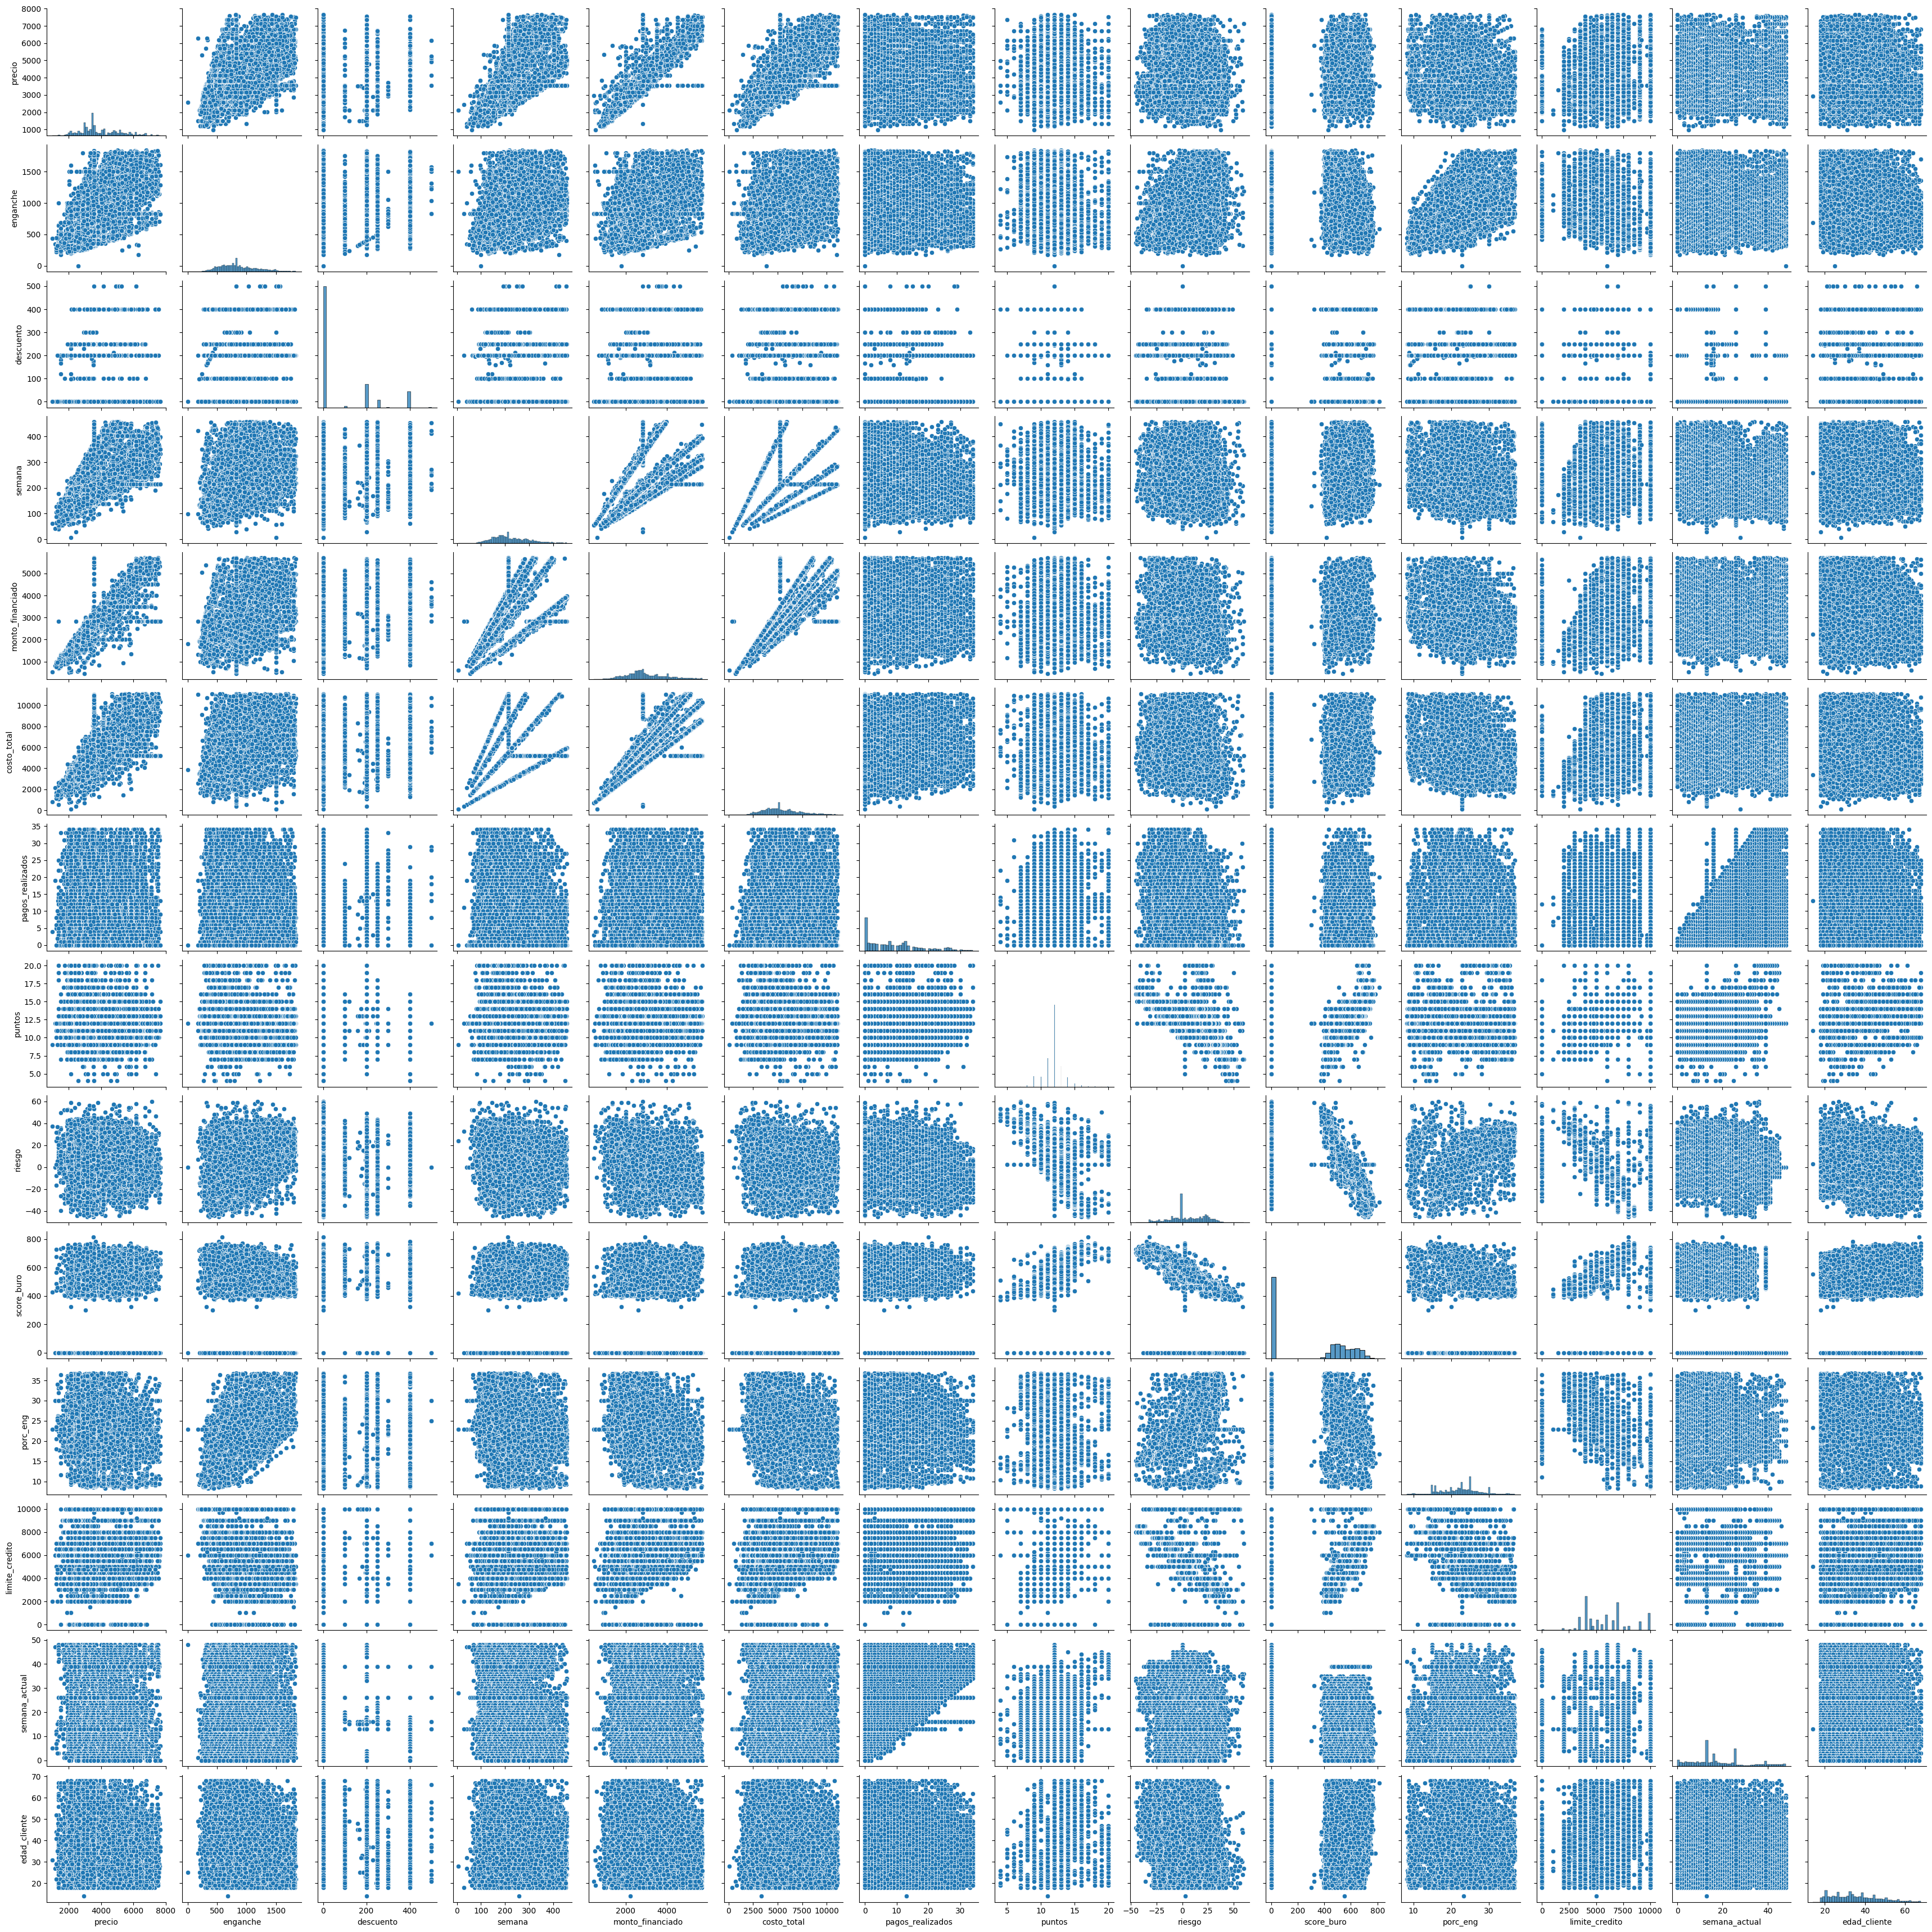

In [122]:
sns.pairplot(df)

    # Función

In [126]:
# Definir las funciones
def funcion_cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

def funcion_exponencial(x, a, b, c):
    return a * np.exp(b * x) + c

def funcion_inversa(x, a):
    return 1 / (a * x)

def funcion_senoidal(x, a, b):
    return a * np.sin(x) + b

def funcion_tangencial(x, a, b):
    return a * np.tan(x) + b

def funcion_valor_absoluto(x, a, b, c):
    return a * np.abs(x) + b * x + c

def funcion_cociente_polinomios(x, a, b, c):
    return (a * x**2 + b) / (c * x)

def funcion_logaritmica(x, a, b):
    return a * np.log(x) + b

def funcion_lineal_producto_coeficientes(x, a, b, c):
    return a * x + b * x + c * x

def funcion_cuadratica_inversa(x, a):
    return 1 / (a * x**2)

def funcion_polinomial_inversa(x, a, b, c):
    return (a / b) * x**2 + c * x

# Diccionario de operaciones
operaciones = {
    'Función cuadrática': funcion_cuadratica,
    'Función exponencial': funcion_exponencial,
    'Función inversa': funcion_inversa,
    'Función senoidal': funcion_senoidal,
    'Función tangencial': funcion_tangencial,
    'Función Valor absoluto': funcion_valor_absoluto,
    'Función cociente entre polinomios': funcion_cociente_polinomios,
    'Función logaritmica': funcion_logaritmica,
    'Función lineal con producto de coeficientes': funcion_lineal_producto_coeficientes,
    'Función cuadrática inversa': funcion_cuadratica_inversa,
    'Función polinomial inversa': funcion_polinomial_inversa
}

resultados = []

def regresion_no_lineal(df, X_col, y_col, modelo):
    X = df[X_col].values.ravel()  # Usamos ravel() para asegurarnos de que es unidimensional
    y = df[y_col].values.ravel()  # Lo mismo para y

    func = operaciones[modelo]

    # Si el modelo es 'Función senoidal', escalamos X a [0, 2*pi]
    if modelo == 'Función senoidal':
        scaler = MinMaxScaler(feature_range=(0, 2*np.pi))
        X = scaler.fit_transform(X.reshape(-1, 1)).ravel()


    # Ajustar la curva
    try:
        popt, pcov = curve_fit(func, X, y)
    except Exception as e:  # Para ver el error exacto
        print(f"Error: {e}")
        print("No se pudo ajustar el modelo a los datos.")
        return

    # Calcular r2
    r2 = r2_score(y, func(X, *popt))
    print("\n")
    print('\033[1;31m' + f'\n\u001b[1;4mVariable objetivo {X_col} vs. {y_col}:\u001b[0m')
    print(f'{modelo}')
    print(f'Coeficientes: {popt}')
    print(f'Coeficiente de determinación: {r2}')
    print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')
    print(f'Coeficiente de correlación de Pearson: {np.corrcoef(X.T, y)[0, 1]}')

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Datos reales')
    plt.plot(X, func(X, *popt), 'r', label='Predicciones')
    plt.legend(loc='best')
    plt.xlabel(X_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {X_col}')
    plt.show()

    resultados.append([X_col, y_col, modelo, r2])
    
    return r2

# Análisis Variable riesgo como variable objetivo




Variable objetivo riesgo vs. precio:
Función cuadrática
Coeficientes: [-3.97685472e-02 -2.08516384e+00  3.95430357e+03]
Coeficiente de determinación: 0.0012332503054468535
Raíz cuadrada del coeficiente de determinación: 0.03511766372421226
Coeficiente de correlación de Pearson: -0.03310413570348174


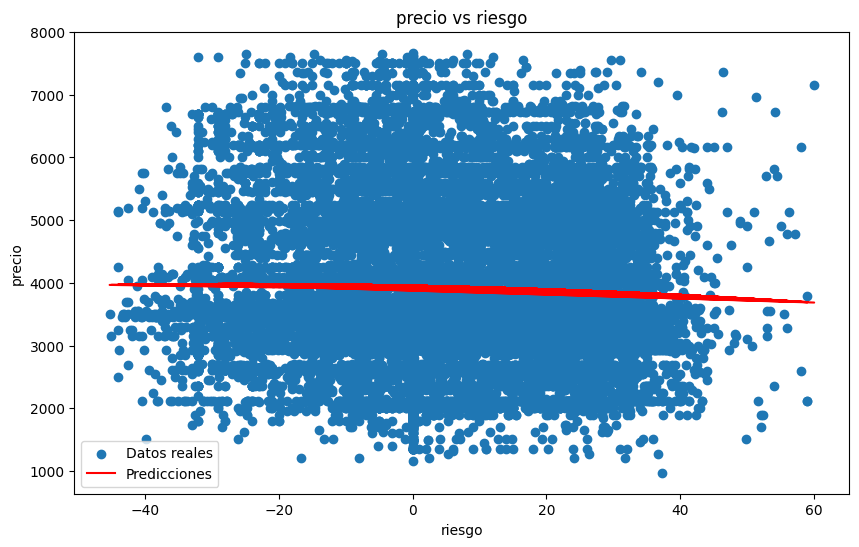




Variable objetivo riesgo vs. enganche:
Función polinomial inversa
Coeficientes: [-252.08878824 -244.21988416    6.62323765]
Coeficiente de determinación: -3.977211415349174
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: 0.30180092540227316


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


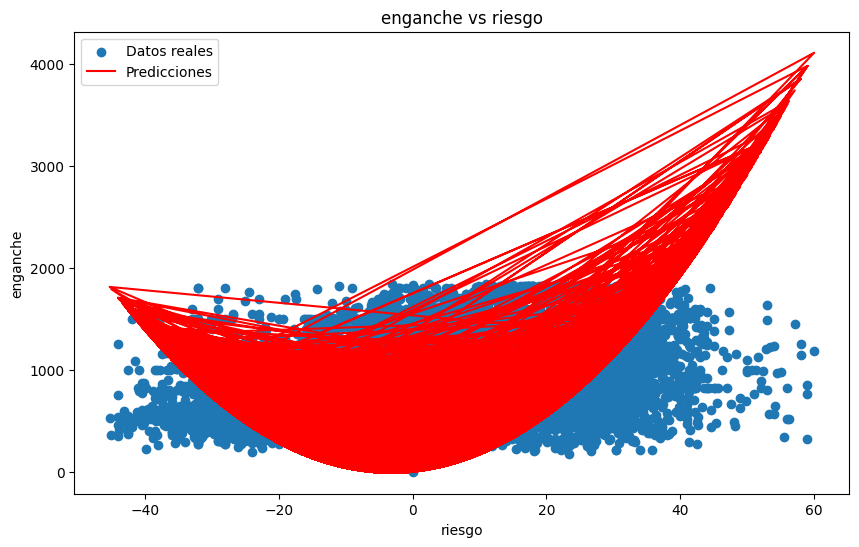




Variable objetivo riesgo vs. descuento:
Función lineal con producto de coeficientes
Coeficientes: [-70.19097874 -70.19097874 141.94105561]
Coeficiente de determinación: -0.3017081287930865
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: 0.04368999788994594


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


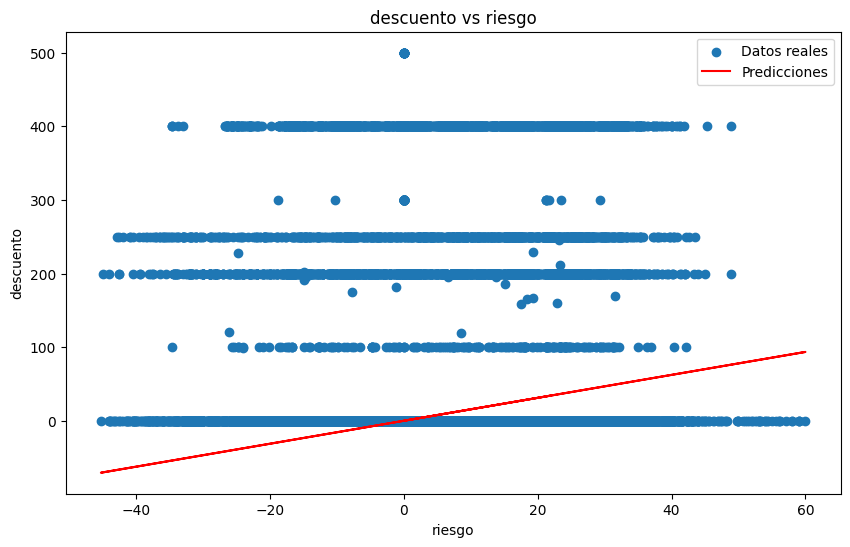




Variable objetivo riesgo vs. monto_financiado:
Función lineal con producto de coeficientes
Coeficientes: [-57.50024523 -57.51057136 154.62662587]
Coeficiente de determinación: -9.248030160597352
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: -0.16314127166572154


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


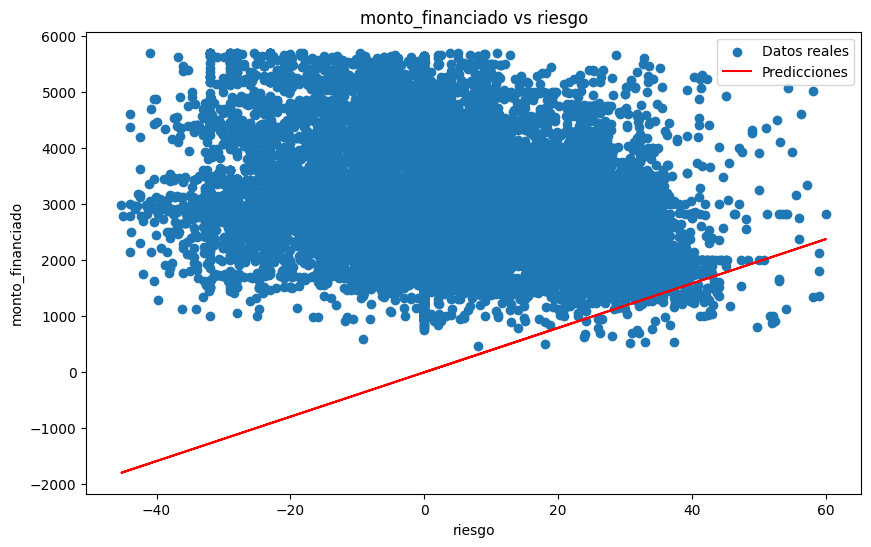




Variable objetivo riesgo vs. puntos:
Función cuadrática
Coeficientes: [-3.67319444e-04 -4.19711856e-02  1.21632805e+01]
Coeficiente de determinación: 0.26261840300379635
Raíz cuadrada del coeficiente de determinación: 0.5124630747710476
Coeficiente de correlación de Pearson: -0.5048908478444617


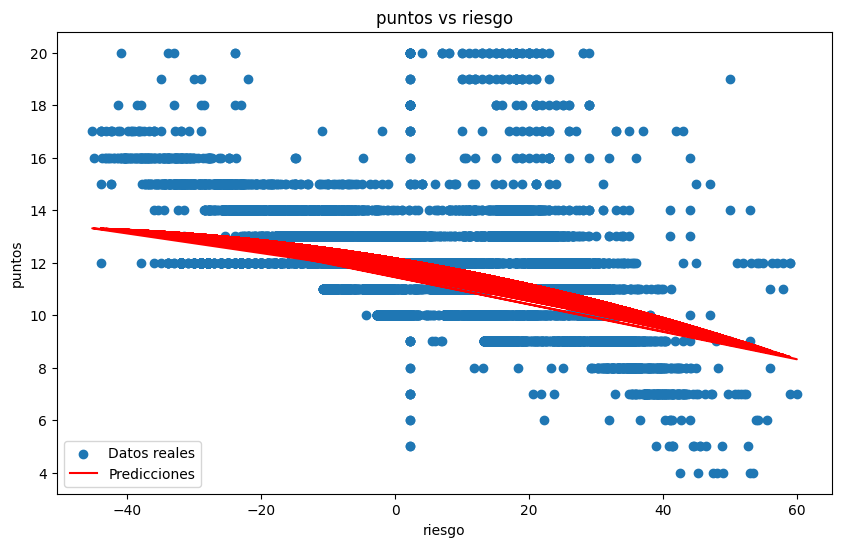




Variable objetivo score_buro vs. precio:
Función cuadrática
Coeficientes: [ 1.04254977e-03 -2.95774513e-01  3.84421757e+03]
Coeficiente de determinación: 0.006297813712401346
Raíz cuadrada del coeficiente de determinación: 0.07935876581954476
Coeficiente de correlación de Pearson: 0.0739573385093066


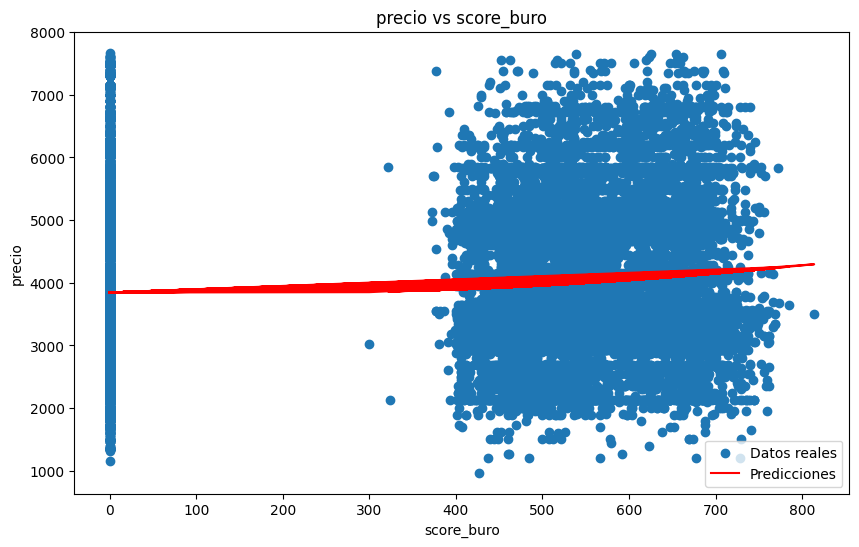




Variable objetivo score_buro vs. enganche:
Función polinomial inversa
Coeficientes: [-0.03268522  7.04706703  4.26889399]
Coeficiente de determinación: -3.0980541719736028
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: 0.0912298853161841


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


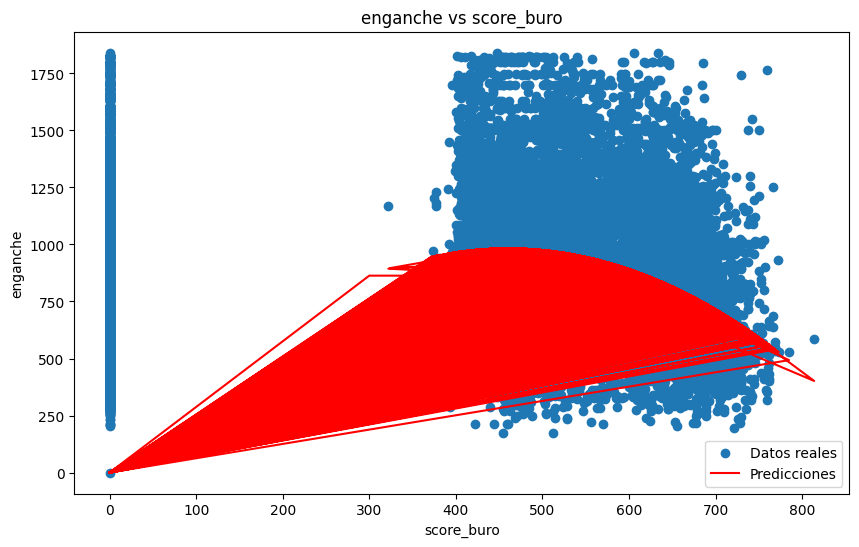




Variable objetivo score_buro vs. descuento:
Función lineal con producto de coeficientes
Coeficientes: [-141.36736095   70.7646876    70.7646876 ]
Coeficiente de determinación: -0.10331800725622964
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: 0.10399798298197194


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


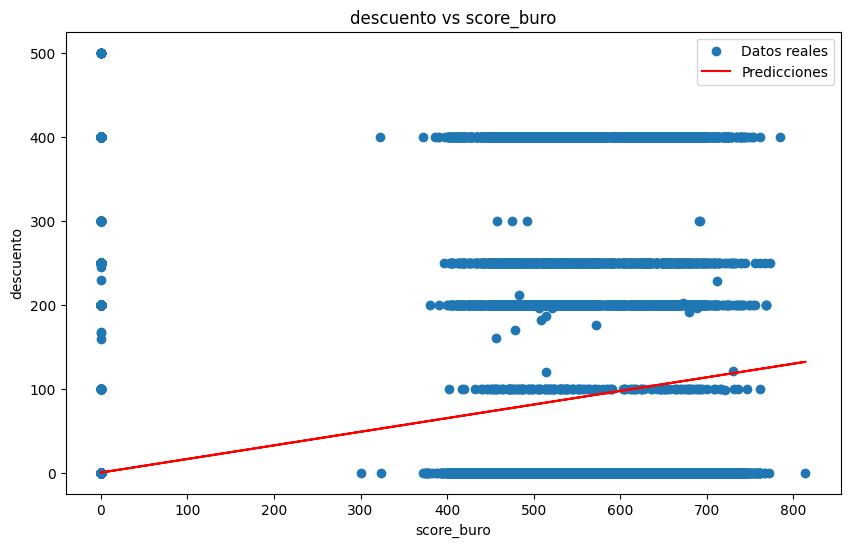




Variable objetivo score_buro vs. monto_financiado:
Función lineal con producto de coeficientes
Coeficientes: [-139.61602383   72.51601052   72.51601052]
Coeficiente de determinación: -4.536999416130684
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: 0.08451614874328729


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


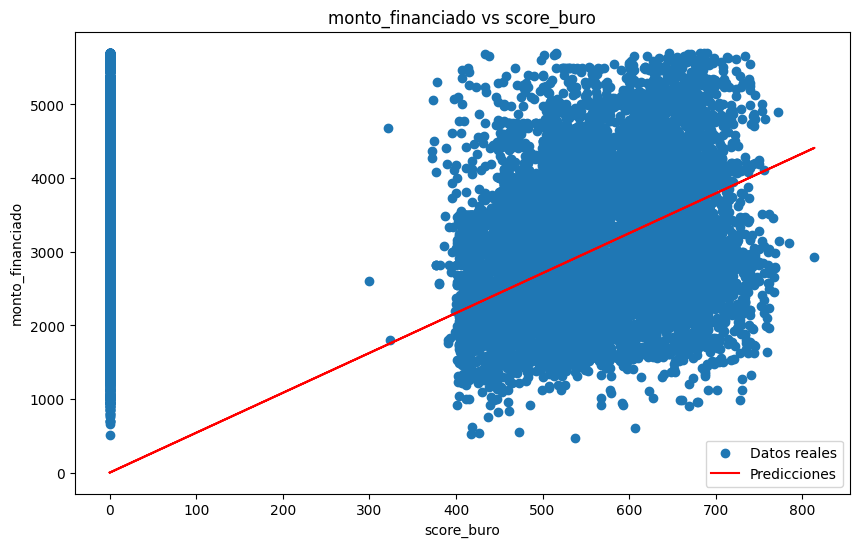




Variable objetivo score_buro vs. puntos:
Función cuadrática
Coeficientes: [ 2.90856096e-05 -1.79071238e-02  1.22218335e+01]
Coeficiente de determinación: 0.43626338273442666
Raíz cuadrada del coeficiente de determinación: 0.6605023714828181
Coeficiente de correlación de Pearson: -0.11205675167244099


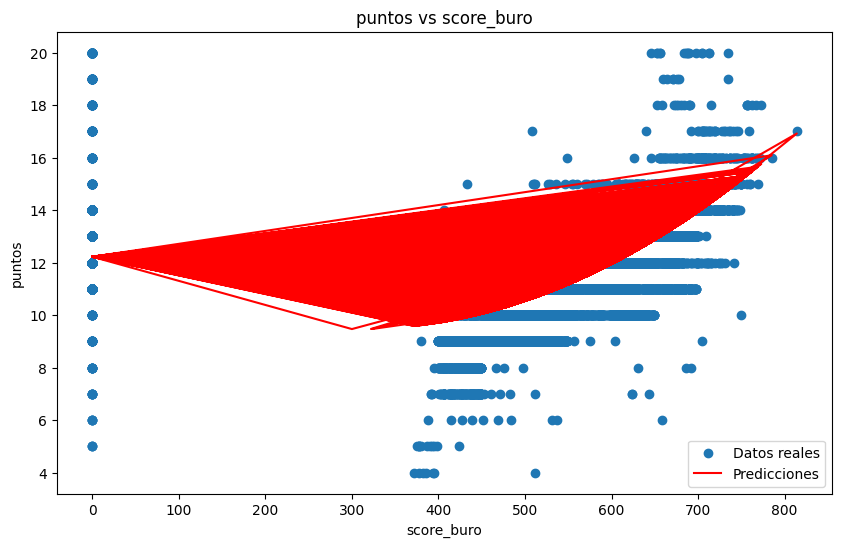




Variable objetivo porc_eng vs. precio:
Función cuadrática
Coeficientes: [ 1.82607908e+00 -9.33115316e+01  5.05277273e+03]
Coeficiente de determinación: 0.0054394632148557776
Raíz cuadrada del coeficiente de determinación: 0.07375271666085106
Coeficiente de correlación de Pearson: -0.0479886850322301


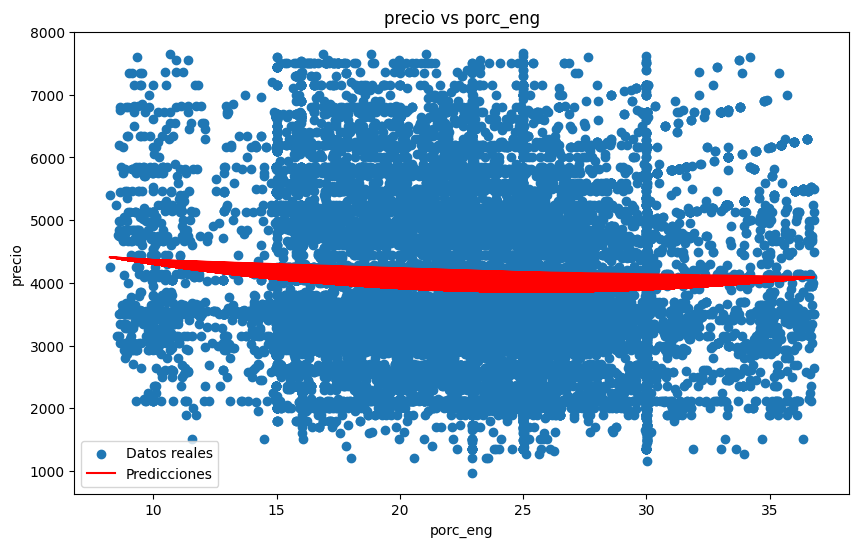




Variable objetivo porc_eng vs. enganche:
Función polinomial inversa
Coeficientes: [-4.34067497  9.66404814 49.39950973]
Coeficiente de determinación: 0.24547251707051265
Raíz cuadrada del coeficiente de determinación: 0.49545183123136466
Coeficiente de correlación de Pearson: 0.4897989751791225


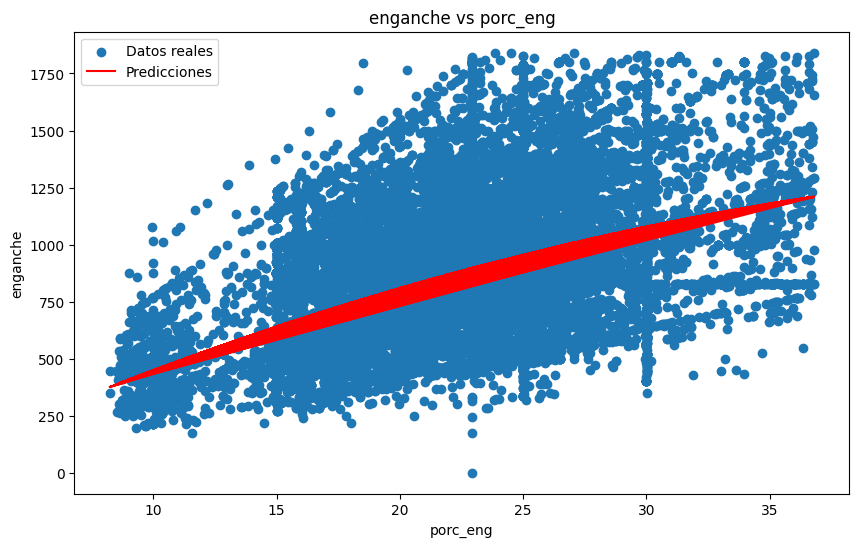




Variable objetivo porc_eng vs. descuento:
Función lineal con producto de coeficientes
Coeficientes: [  71.79680044   71.79680044 -140.33517344]
Coeficiente de determinación: -0.03298386687162891
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: -0.05708464800753212


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


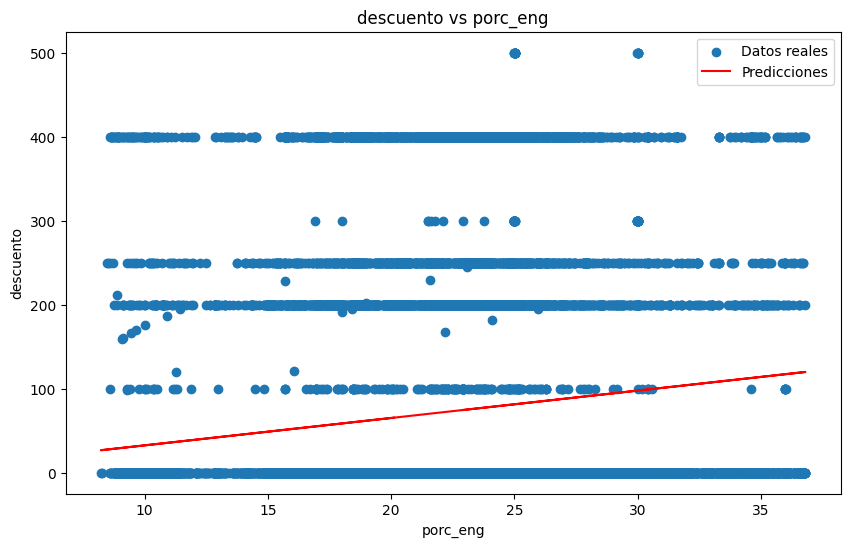




Variable objetivo porc_eng vs. monto_financiado:
Función lineal con producto de coeficientes
Coeficientes: [-99.64500157 112.48703278 112.48703278]
Coeficiente de determinación: -0.8111436340261522
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: -0.2145081161396642


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


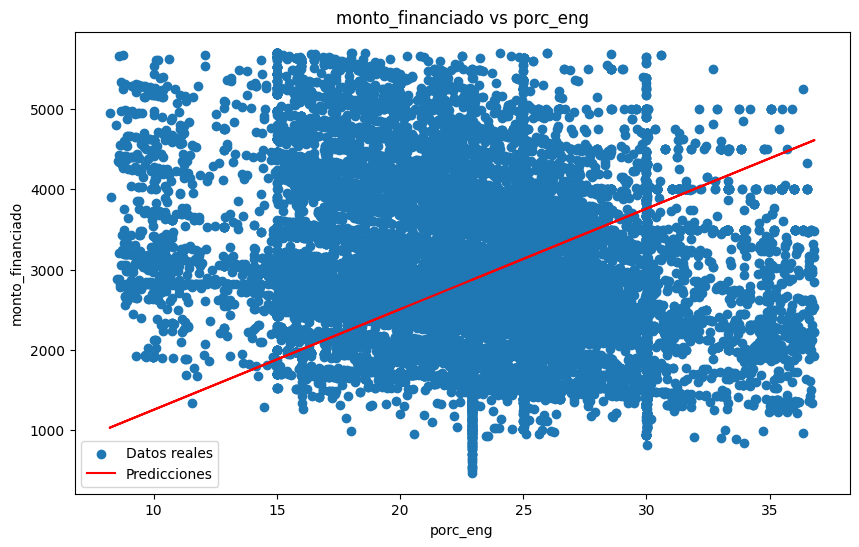




Variable objetivo porc_eng vs. puntos:
Función cuadrática
Coeficientes: [-2.13012283e-03  1.77235321e-02  1.25439034e+01]
Coeficiente de determinación: 0.07336807663480749
Raíz cuadrada del coeficiente de determinación: 0.27086542163001814
Coeficiente de correlación de Pearson: -0.2656359600740959


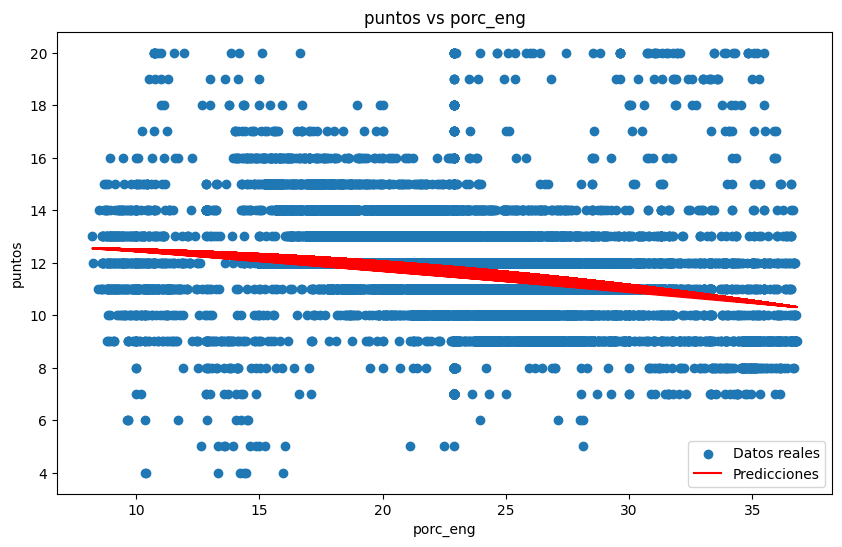




Variable objetivo limite_credito vs. precio:
Función cuadrática
Coeficientes: [-4.27984262e-06  8.42049547e-02  3.60134594e+03]
Coeficiente de determinación: 0.0028383965812881495
Raíz cuadrada del coeficiente de determinación: 0.053276604445930575
Coeficiente de correlación de Pearson: 0.05028426600543593


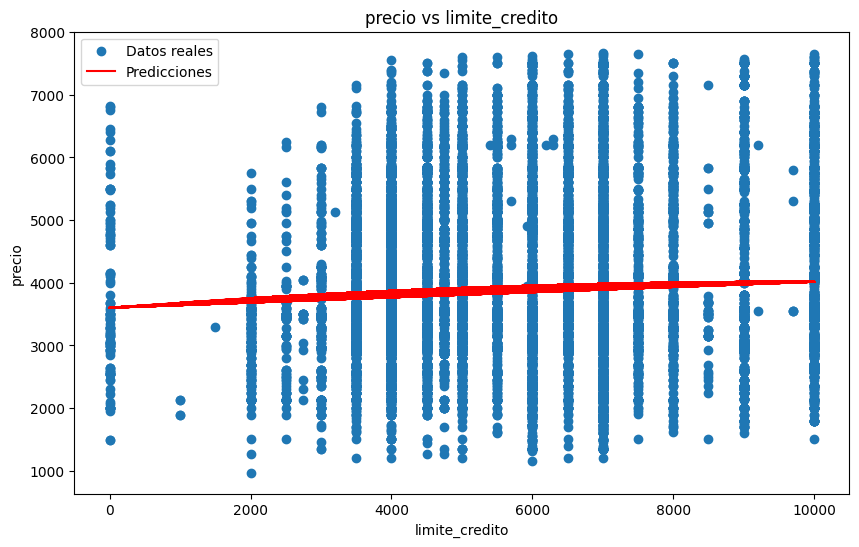




Variable objetivo limite_credito vs. enganche:
Función polinomial inversa
Coeficientes: [-9.26197615e-03  3.20884423e+02  3.35466173e-01]
Coeficiente de determinación: -0.05429901810849924
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: -0.37242903122254584


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


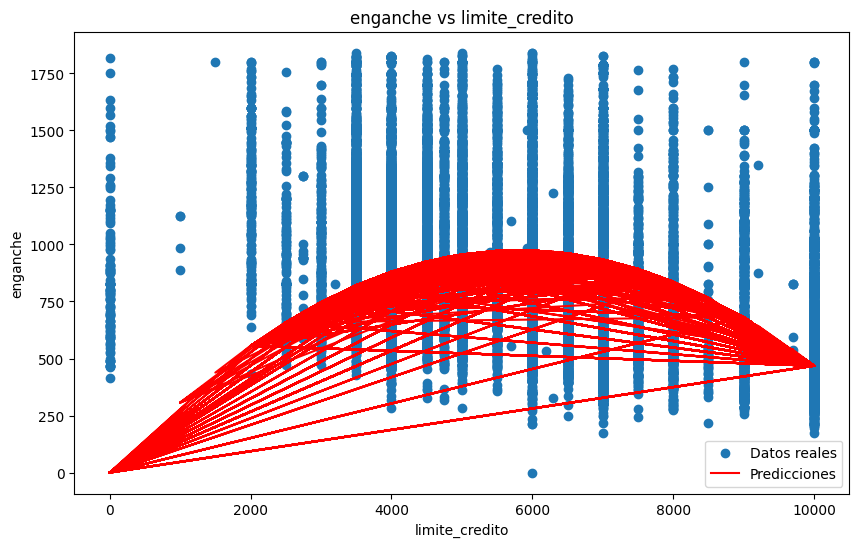




Variable objetivo limite_credito vs. descuento:
Función lineal con producto de coeficientes
Coeficientes: [141.43398448 -70.71143488 -70.71143488]
Coeficiente de determinación: -0.07390308771908094
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: -0.09604066293355393


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


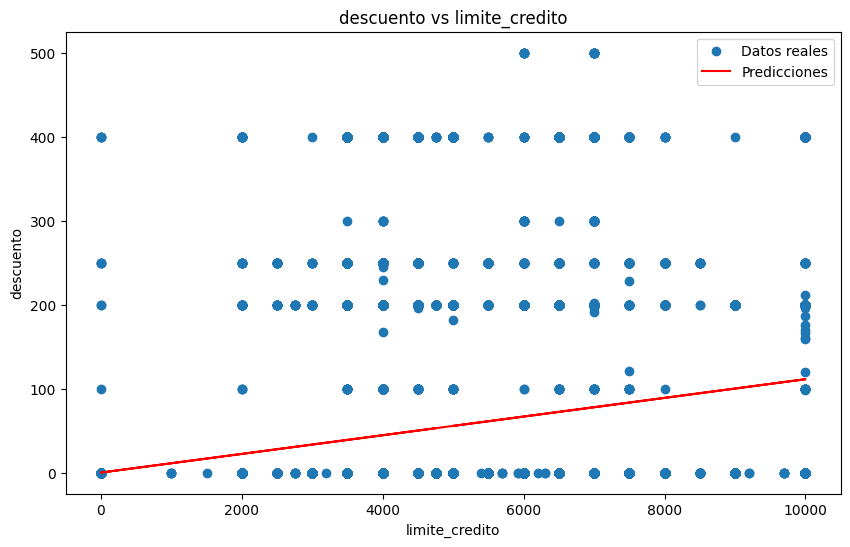




Variable objetivo limite_credito vs. monto_financiado:
Función lineal con producto de coeficientes
Coeficientes: [141.57473346 -70.55730355 -70.55730355]
Coeficiente de determinación: -0.7443774841651809
Raíz cuadrada del coeficiente de determinación: nan
Coeficiente de correlación de Pearson: 0.18130489111031028


/var/folders/m7/pfsmcmd94k1_4j50b57tnvvw0000gn/T/ipykernel_30577/250878582.py:79: RuntimeWarning: invalid value encountered in sqrt
  print(f'Raíz cuadrada del coeficiente de determinación: {np.sqrt(r2)}')


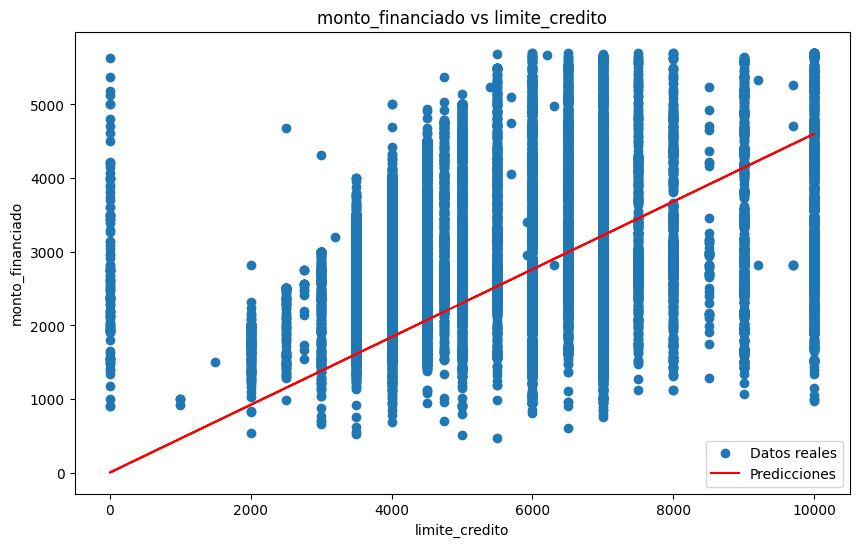




Variable objetivo limite_credito vs. puntos:
Función cuadrática
Coeficientes: [-8.18198657e-08  1.26176500e-03  7.58728150e+00]
Coeficiente de determinación: 0.16612087942728093
Raíz cuadrada del coeficiente de determinación: 0.407579292196354
Coeficiente de correlación de Pearson: 0.30276949518637597


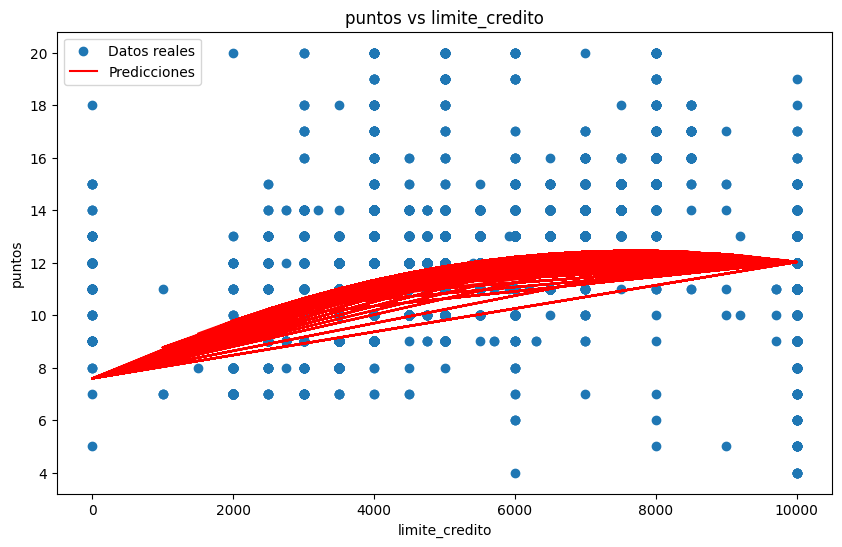

In [127]:
coef = regresion_no_lineal(df, 'riesgo', 'precio', "Función cuadrática")
coef = regresion_no_lineal(df, 'riesgo', 'enganche', "Función polinomial inversa")
coef = regresion_no_lineal(df, 'riesgo', 'descuento', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'riesgo', 'monto_financiado', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'riesgo', 'puntos', "Función cuadrática")

coef = regresion_no_lineal(df, 'score_buro', 'precio', "Función cuadrática")
coef = regresion_no_lineal(df, 'score_buro', 'enganche', "Función polinomial inversa")
coef = regresion_no_lineal(df, 'score_buro', 'descuento', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'score_buro', 'monto_financiado', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'score_buro', 'puntos', "Función cuadrática")

coef = regresion_no_lineal(df, 'porc_eng', 'precio', "Función cuadrática")
coef = regresion_no_lineal(df, 'porc_eng', 'enganche', "Función polinomial inversa")
coef = regresion_no_lineal(df, 'porc_eng', 'descuento', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'porc_eng', 'monto_financiado', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'porc_eng', 'puntos', "Función cuadrática")

coef = regresion_no_lineal(df, 'limite_credito', 'precio', "Función cuadrática")
coef = regresion_no_lineal(df, 'limite_credito', 'enganche', "Función polinomial inversa")
coef = regresion_no_lineal(df, 'limite_credito', 'descuento', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'limite_credito', 'monto_financiado', "Función lineal con producto de coeficientes")
coef = regresion_no_lineal(df, 'limite_credito', 'puntos', "Función cuadrática")


df_resultados = pd.DataFrame(resultados, columns=['variable_X', 'variable_y', 'modelo', 'R2'])


In [128]:
df_resultados

variable_X        variable_y  \
0           riesgo            precio   
1           riesgo          enganche   
2           riesgo         descuento   
3           riesgo  monto_financiado   
4           riesgo            puntos   
5       score_buro            precio   
6       score_buro          enganche   
7       score_buro         descuento   
8       score_buro  monto_financiado   
9       score_buro            puntos   
10        porc_eng            precio   
11        porc_eng          enganche   
12        porc_eng         descuento   
13        porc_eng  monto_financiado   
14        porc_eng            puntos   
15  limite_credito            precio   
16  limite_credito          enganche   
17  limite_credito         descuento   
18  limite_credito  monto_financiado   
19  limite_credito            puntos   

                                         modelo        R2  
0                            Función cuadrática  0.001233  
1                    Función polinomial inversa -3.977211  
2   Función lineal con producto de coeficientes -0.301708  
3   Función lineal con producto de coeficientes -9.248030  
4                            Función cuadrática  0.262618  
5                            Función cuadrática  0.006298  
6                    Función polinomial inversa -3.098054  
7   Función lineal con producto de coeficientes -0.103318  
8   Función lineal con producto de coeficientes -4.536999  
9                            Función cuadrática  0.436263  
10                           Función cuadrática  0.005439  
11                   Función polinomial inversa  0.245473  
12  Función lineal con producto de coeficientes -0.032984  
13  Función lineal con producto de coeficientes -0.811144  
14                           Función cuadrática  0.073368  
15                           Función cuadrática  0.002838  
16                   Función polinomial inversa -0.054299  
17  Función lineal con producto de coeficientes -0.073903  
18  Función lineal con producto de coeficientes -0.744377  
19                           Función cuadrática  0.166121

In [129]:
texto = '''
Mejores modelos según R2 para cada variable_X:

riesgo: puntos con R2 de 0.262618
score_buro: puntos con R2 de 0.436263
porc_eng: enganche con R2 de 0.245473
limite_credito: puntos con R2 de 0.166121
'''

print(texto)


Mejores modelos según R2 para cada variable_X:

riesgo: puntos con R2 de 0.262618
score_buro: puntos con R2 de 0.436263
porc_eng: enganche con R2 de 0.245473
limite_credito: puntos con R2 de 0.166121

